In [1]:
import numpy as np
import splat
import wisps
import pandas as pd
from scipy import stats
import numba

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def create_wisp_spectrum(filename):
    try:
        #convert splat spectrum into wisp spectrum
        splat_spectrum=splat.getSpectrum(filename=filename)[0]
        s=wisps.Spectrum(wave=splat_spectrum.wave.value,
                         flux=splat_spectrum.flux.value,
                         noise=splat_spectrum.noise.value)
        s.classify_by_standard
        return s
    except:
        pass

In [4]:
splat_db=splat.searchLibrary(vlm=True, giant=False)

In [5]:
%%capture
spectra=splat_db.DATA_FILE.apply(create_wisp_spectrum)

In [6]:
indices=[x.indices for x in spectra]

In [7]:
df=pd.DataFrame(indices)

In [8]:
#s.best_fit_line

In [9]:
df['spt']=[x.spt for x in spectra]

In [10]:
features=['CH_4/H-Cont', 'CH_4/H_2O-1', 'CH_4/H_2O-2', 'CH_4/J-Cont',
       'H-cont/H_2O-1', 'H-cont/H_2O-2', 'H-cont/J-Cont', 'H_2O-1/J-Cont',
       'H_2O-2/H_2O-1', 'H_2O-2/J-Cont',  'spex_chi', 'snr2',
       'line_chi', 'f_test', 'x']

In [11]:
df['f_test']=[x.f for x in spectra]

In [12]:
df['line_chi']=[x.line_chi for x in spectra]

In [13]:
df['spex_chi']=[x.spex_chi for x in spectra]

In [14]:
spex_df=df.join(pd.DataFrame([x.snr for x in spectra]))

In [15]:
spex_df['grism_id']=splat_db.DESIGNATION.values

In [16]:
spex_df['j_2mass']=splat_db.J_2MASS
spex_df['h_2mass']=splat_db.H_2MASS
spex_df['metallicity_cls']=splat_db.METALLICITY_CLASS
spex_df['gravity_cls']=splat_db.GRAVITY_CLASS_NIR


In [17]:
spex_df.to_pickle(wisps.LIBRARIES+'/spex_data_set.pkl')

In [22]:
#vals=spex_df['spt'].apply(splat.typeToNum)

In [21]:
#(spex_df[np.logical_and(vals>17., vals<=20)])[wisps.INDEX_NAMES].values

In [23]:
#spex_df['spt'].apply(splat.typeToNum)

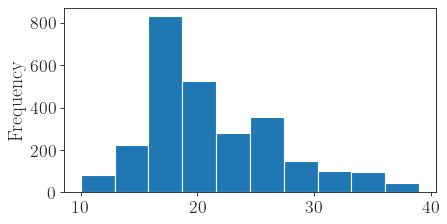

In [25]:
spex_df.spt.apply(splat.typeToNum).plot(kind='hist')